# Breast Cancer Prediction using Logistic Regression

This project is written in Python 3.11.

Project completed on 2023-04-24 by Simona Birutė Ašmonaitė

Classification, in simple terms, is the prediction of which class the item belongs to. On the other hand, regression predicts a continuous output. Common ML classification algorithms:
* Logistic Regression
* Decision Tree
* Random Forest
* KNN
* SVM
* Naive Bayes.

<br> More information about classification algorithms can be found here: https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501
<br> Information about regression algorithms can be found here: https://towardsdatascience.com/top-machine-learning-algorithms-for-regression-c67258a2c0ac

### **Aim:**
Given breast tumor parameters, predict if the growth is benign or malignant (cancerous).

### **Dataset Description:**
Lung and Beast cancer are the 1st and 2nd cause of cancer deaths in women, respectivaly. This dataset was obtained from Dr. William H. Wolberg (University of Wisconsin Hospitals, Madison). It has 569 rows and 6 columns:
* **diagnosis:** The diagnosis of breast tissues (1 = malignant, 0 = benign)
* **mean_radius:** mean of distances from center to points on the perimeter
* **mean_texture:** standard deviation of gray-scale values
* **mean_perimeter:** mean size of the core tumor
* **mean_area:** mean area of the core tumor
* **mean_smoothness:** mean of local variation in radius lengths.

Given various parameters, we want to know whether the tumor is malignant or benign, thus it is a classification problem.

Source: https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset

### **Contents:**
0. Initialization
1. EDA
    - 1.1 Plotting and correlation
    - 1.2 Bonus - How to deal with outliers?
2. Model Selection
3. Logistic Regression
    - 3.1 Confusion Matrix
4. Forward Feature Selection
5. Logistic Regression with best features
6. Conclusion

# 0. Initialization

In [111]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.feature_selection import SequentialFeatureSelector

In [112]:
# code assumes the dataset is in the same folder as the .ipynb file

# loading the dataset from csv file
cancer = pd.read_csv("Breast_cancer_data.csv")
type(cancer)

pandas.core.frame.DataFrame

# 1. EDA
Exploratory Data Analysis (EDA) - investigation and familiarization of the data. The goal of EDA is to understand the data, generate first insights & questions. 
For example, we can ask ourselves such questions:
* Are the column names understandable? Are they too long? Are there duplicated names?
* Are there missing values? How best to clean them (if there's alot of missing values in each column and our dataset is small, removing them might not be the best option)?
* What are the value counts?
* Are the data values understandable? Do we need to convert or encode them?

EDA steps:
1. Understanding the dataset, for example: head, tail, shape, info, describe.
2. Cleaning, for example: .isduplicated(), .duplicated().
3. Univariate analysis is the deep dive into the variables of interest, for example: .value_counts(), .describe(), plotting the variables of interest.
4. Analysis of relationships between variables, for example: pair plot, boxplot, heatmap.
5. Modeling or further analysis.

Reference: https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

In [113]:
# preview first 5 rows of data
print(cancer.head())
# preview last 5 rows of data
print(cancer.tail())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0      

In [114]:
# printing column names using 2 methods
print(cancer.keys())
print(cancer.columns)

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')
Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')


In [115]:
# Check the data types of each column and presence of null values
# More info: https://www.codecademy.com/learn/stats-variable-types/modules/stats-variable-types/cheatsheet
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [116]:
# checking for missing values in columns
print(cancer.isnull().sum())
# Similar code, but output is in a table:
# salaries[salaries.isnull().any(axis=1)]

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [117]:
# number of unique values in each column
cancer.nunique()

mean_radius        456
mean_texture       479
mean_perimeter     522
mean_area          539
mean_smoothness    474
diagnosis            2
dtype: int64

In [118]:
# checking for duplicates
cancer.duplicated().sum()

0

In [119]:
# view the number of rows and columns
print(cancer.shape)


(569, 6)


In [120]:
# printing summary statistics
print(cancer.describe())

       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000  


In [121]:
# uncomment to double check median
# np.median(cancer['mean_radius'])

In [122]:
# how many malignant and benign samples do we have?
cancer.value_counts('diagnosis')

diagnosis
1    357
0    212
dtype: int64

**Observations:**
1. Column names need explanation (see the start of the project).
2. Values are all floats or integers, no need to encode them.
3. No null values.
4. 569 rows and 6 columns.
5. 357 malignant samples and 212 benign samples.
6. Feature columns have light right-skewness.

**Cheatsheet - Skewness:**
* Median (Q2 or 50%) - means 50% of data is lower/higher than this value.
* Mean/average - average values.
* Mean is more sensitive to outliers than median. If data is simetrical - use mean. If data is skewed - use median.
* Mean is pulled in the direction of the skew:
- **Right-skewed data: mean > median.**
- **Left-skewed data: mean < median.**

Skewned is determined by the positioning of the tail: if the tail trails off on the right side, then it's right-skewed; if the tail trails off on the left side, then it's left-skewed.

Source: DataCamp's "Data Analyst with Python" Track.

### 1.1. Plotting and correlation

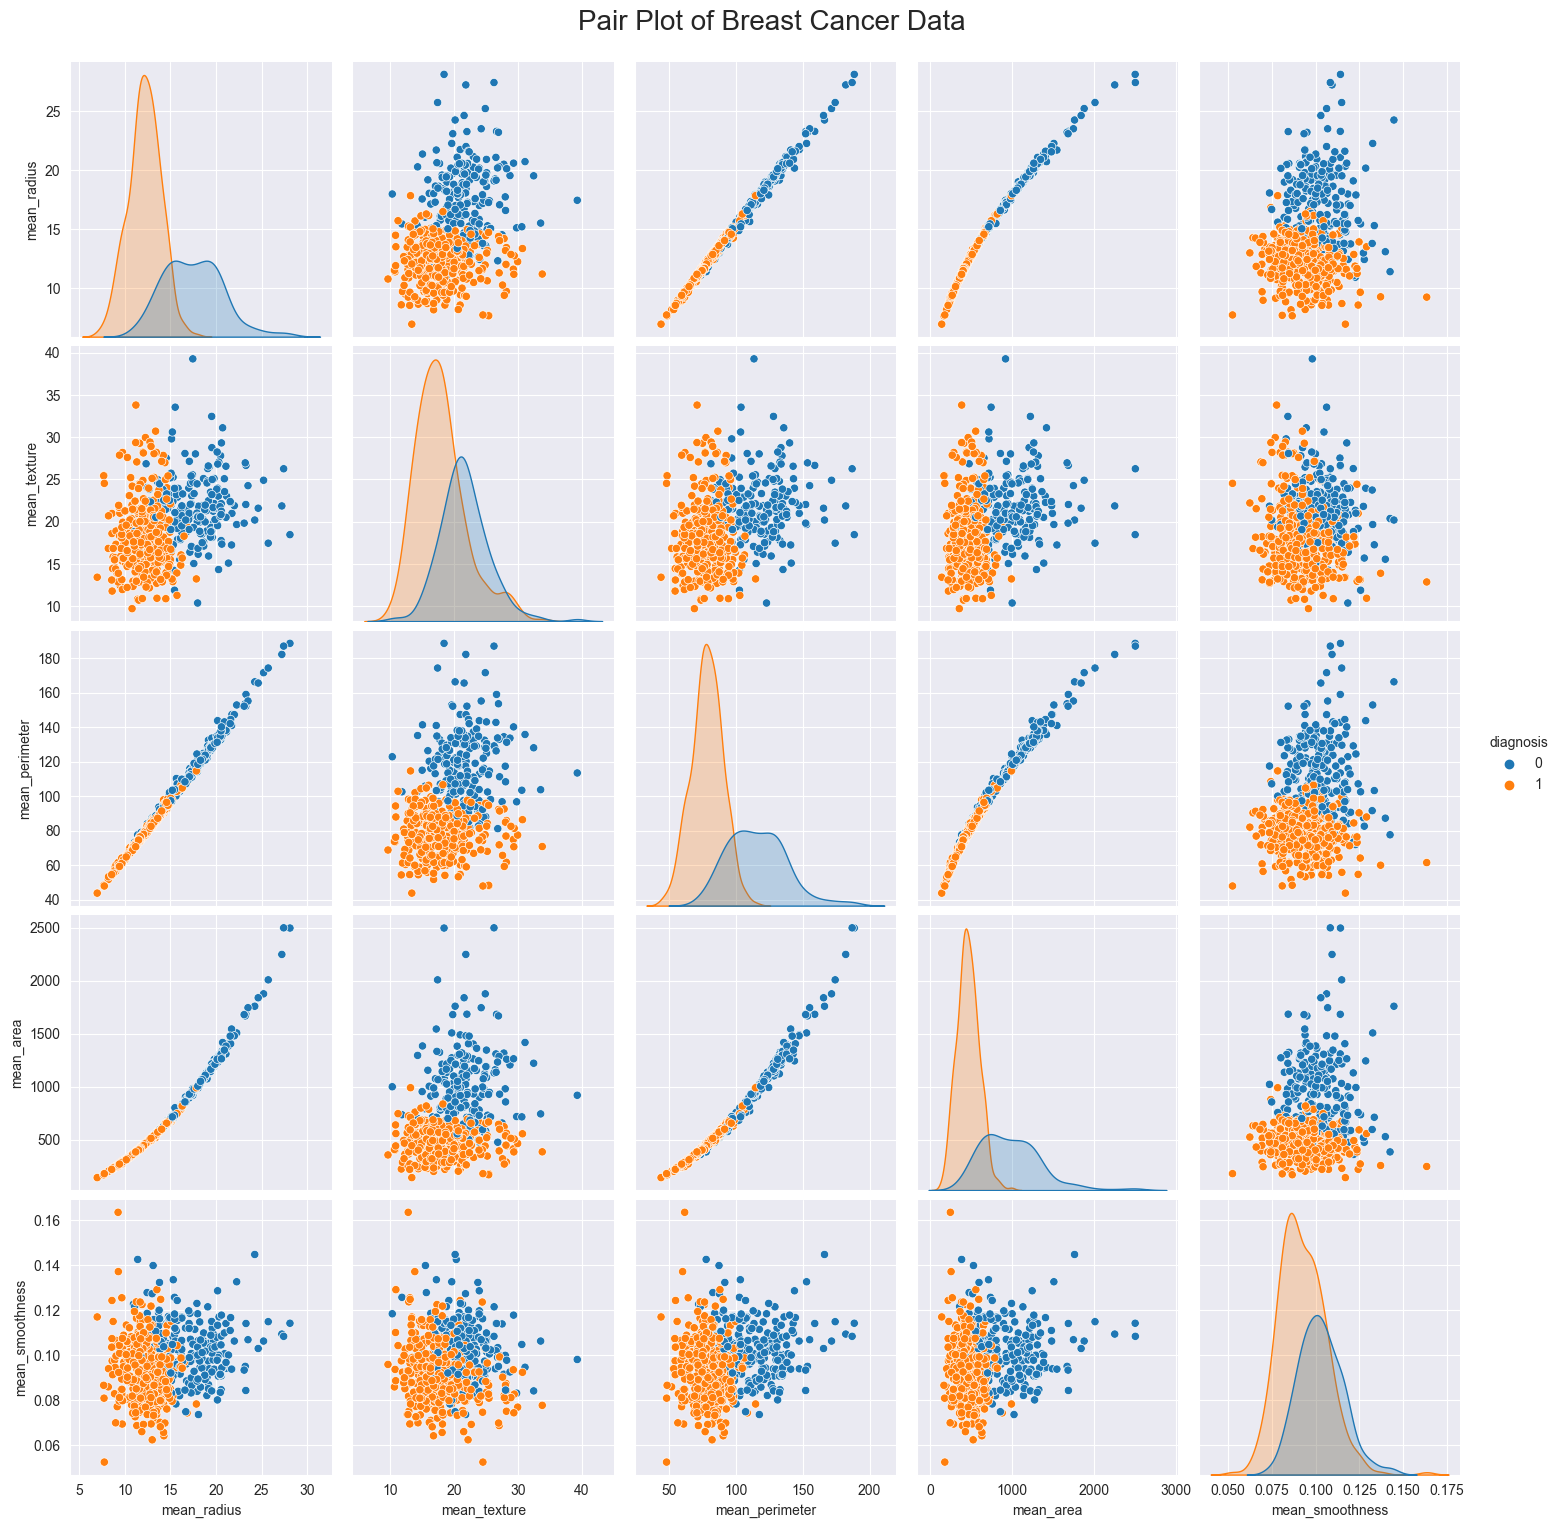

In [123]:
sns.set_style("darkgrid")
# Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE).
# KDE - distribution of observations in a dataset, analogous to a histogram. 
# KDE represents the data using a continuous probability density curve in one or more dimensions.
plot = sns.pairplot(cancer, hue = "diagnosis", height = 3)
plot.fig.suptitle('Pair Plot of Breast Cancer Data', size = 20, y = 1.02) # y = controls title height placement
plt.show()
# Legend: malignant - orange; benign - blue.

Additional resources for KDEs: https://www.youtube.com/watch?v=Txlm4ORI4Gs

<AxesSubplot: >

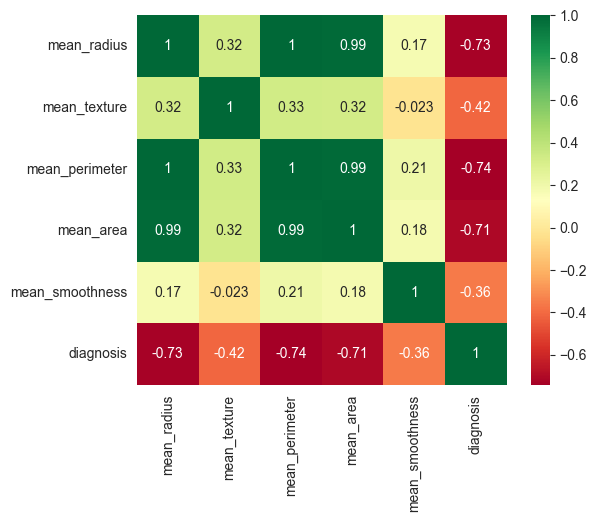

In [124]:
# correleation heatmap with all numerical data
# annot=True => shows corr numbers inside squares
sns.heatmap(cancer.corr(numeric_only = True), square = True, cmap = 'RdYlGn', annot = True)
# green - positive correlation; red - negative correlation

In [125]:
# Calculate correlation with 'diagnosis' column
corr_values = cancer.corr()['diagnosis'].drop('diagnosis')

# Sort the correlations in descending order
sorted_corr = corr_values.sort_values(ascending=False)
print(sorted_corr)

mean_smoothness   -0.358560
mean_texture      -0.415185
mean_area         -0.708984
mean_radius       -0.730029
mean_perimeter    -0.742636
Name: diagnosis, dtype: float64


**Observations:**

**Pairplot:**
1. 'mean_perimeter' vs 'mean_radius' have linear relationship.
2. 'mean_area' has curvi-linear relationship with 'mean_radius' and 'mean_perimeter'.
3. Other 6 feature combinations have cluster-like seperation with overlapping.

**Correlation:**
1. 'mean_perimeter' vs 'mean_area' and 'mean_radius' vs 'mean_area' have a very high positive correlation, 'mean_texture' vs 'mean_mean_radius' have low positive correlation. Couple other feature combinations have negligible correlation.
2. **'diagnosis'** vs **features:** 'mean_smoothness' and 'mean_texture' features have a low negative correlation. 'mean_area', 'mean_radius' and 'mean_perimeter' features have a high negative correlation. 

Overall, the negative correlation coefficients indicate that as the mean values of these features increase, the likelihood of the cell being malignant decreases. 

**Correlation does not imply causation** and it's important to keep in mind that other factors may also influence the diagnosis of breast cancer.

**Cheatsheet - Correlation Interpretation for medical data (for + and - values):**
* 0.90 - 1.00 -> Very high positive/negative correlation
* 0.70 - 0.90 -> High positive/negative correlation
* 0.50 - 0.70 -> Moderate positive/negative correlation
* 0.30 - 0.50 -> Low positive/negative correlation
* 0.00 - 0.30 -> negligible correlation

<br>Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/#:~:text=A%20correlation%20coefficient%20of%20zero,between%20%E2%88%921%20and%20%2B1

### 1.2 Bonus - how to deal with outliers?
Since our dataset is fairly small, removing outliers isn't the best option - since then we won't have enough data to train our model on. Column 'mean_area' is the most skewed (comparing mean vs median), that's why I provide general code for removing outliers via the IQR method below using this column. Uncomment to see how it works. For our dataset, we *aren't removing outliers*.

In [126]:
# visualizing outliers with boxplot
# sns.boxplot(data = cancer['mean_area'])

In [127]:
# calculating quartile range and IQR
# Q1 = cancer['mean_area'].quantile(0.25)
#Q3 = cancer['mean_area'].quantile(0.75)
#IQR = Q3 - Q1

# calculating upper and lower limit
#lower_limit = Q1 - 1.5 * IQR
#upper_limit = Q3 + 1.5 * IQR
#print(f'Lower limit is: {lower_limit}')
#print(f'Upper limit is: {upper_limit}')

# filtering to see the outliers - uncomment this separately from others
# cancer[cancer['mean_area'] > upper_limit]

# how many outliers?
# double quotes are needed to avoid syntax error
#print(f"Number of outliers in the upper limit: {cancer[cancer['mean_area'] > upper_limit].count()}")
#print(f"Number of outliers in the lower limit: {cancer[cancer['mean_area'] < lower_limit].count()}")

In [128]:
# shape before outlier removal
# print(f'Data before removing outliers: {cancer.shape}')

# removing outliers
# cancer_clean = cancer[(cancer['mean_area'] >= lower_limit) & (cancer['mean_area'] <= upper_limit)]

# shape after outlier removal
#print(f'Data after removing outliers: {cancer_clean.shape}')

In [129]:
# comparison before and after outlier removal
#plt.figure(figsize = (16, 8))
#plt.subplot(2, 2, 1)
#sns.histplot(cancer['mean_area'], kde = True)

#plt.subplot(2, 2, 2)
#sns.boxplot(data = cancer['mean_area'])

#plt.subplot(2, 2, 3)
#sns.histplot(cancer_clean['mean_area'], kde = True)

#plt.subplot(2, 2, 4)
#sns.boxplot(data = cancer_clean['mean_area'])

#plt.show()

In [130]:
# the comparison plot after looks much better! Let's assign it to the original diamonds data
#cancer = cancer[(cancer['mean_area'] >= lower_limit) & (cancer['mean_area'] <= upper_limit)]
#cancer.shape

# 2. Model Selection

From the pairplot we have seen that for this task, we possibly could use Logistic Regression or KNN. Initial hypothesis is that Logistic Regression should perform better, as the "curved lines" are more well defined than distinct groups of KNN. In this section, we'll evaluate those models using classification eveluation metrics: accuracy, precision, recall, F1-score, and ROC AUC score. For comparison reasons, we'll add Decision Tree.

Model algorithm comparison can be found here: https://medium.com/towards-data-science/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222

In [131]:
# Splitting data into train and test datasets
X = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']

In [132]:
# LOGISTIC REGRESSION
X_train, X_test, y_train, y_test_lr = train_test_split(X, y, test_size = 0.2, random_state = 77)
# assigning the regressor
# default max_iter is 100. Increasing the number of iterations may result in better performance
reg = LogisticRegression(max_iter = 10000)
reg.fit(X_train, y_train)
# Predictions on test data
lr_y_pred = reg.predict(X_test)

In [133]:
# DECISION TREE
X_train, X_test, y_train, y_test_dt = train_test_split(X, y, test_size = 0.2, random_state = 77)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# Predictions on test data
dt_y_pred = dtc.predict(X_test)

In [134]:
# KNN
X_train, X_test, y_train, y_test_knn = train_test_split(X, y, test_size = 0.2, random_state = 77)
# Fitting the KNN classifier model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
# Predictions on test data
knn_y_pred = knn.predict(X_test)

In [135]:
# defining variables for evaluation metric comparison
models = ['Logistic Regression', 'Decision Tree', 'KNN']
y_preds = [lr_y_pred, dt_y_pred, knn_y_pred]
y_tests = [y_test_lr, y_test_dt, y_test_knn]

In [136]:
# create a DataFrame to store the evaluation scores
df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score'])

# iterate over the models and calculate the evaluation scores
# true values: y_tests[i]
# predicted values: y_preds[i]
# i: select correct true & predicted values for the current model being evaluated
for i, model in enumerate(models):
    accuracy = accuracy_score(y_tests[i], y_preds[i])
    precision = precision_score(y_tests[i], y_preds[i])
    recall = recall_score(y_tests[i], y_preds[i])
    f1 = f1_score(y_tests[i], y_preds[i])
    roc_auc = roc_auc_score(y_tests[i], y_preds[i])
    # storing calculated scores in df
    # i: select the row for the current model and add scores
    df.loc[i] = [model, accuracy, precision, recall, f1, roc_auc]

# print the DataFrame
print(df)

                 Model  Accuracy  Precision    Recall  F1-Score  ROC AUC Score
0  Logistic Regression  0.903509   0.910256  0.946667  0.928105       0.883590
1        Decision Tree  0.877193   0.886076  0.933333  0.909091       0.851282
2                  KNN  0.877193   0.858824  0.973333  0.912500       0.832821


In [137]:
# OPTIONAL

# is logistic regression still the best after Cross-Validation (CV)?

from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

# Logistic Regression
# accuracy scores change slightly by increasing/decreasing the number of iterations
logreg = LogisticRegression(max_iter = 10000)
scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring = 'accuracy')
print('Logistic Regression accuracy:', scores.mean())

# Decision Tree
dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc, X_train, y_train, cv = 5, scoring = 'accuracy')
print('Decision Tree accuracy:', scores.mean())

# KNN
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
print('KNN accuracy:', scores.mean())

Logistic Regression accuracy: 0.9120879120879121
Decision Tree accuracy: 0.9120879120879122
KNN accuracy: 0.9032967032967033


**Observations:**
* **accuracy:** all 3 models have fairly similar accuracy scores, with the logistic regression and decision tree models performing slightly better than the KNN model.
* **precision:** the logistic regression model has the highest precision score, followed closely by the decision tree model, while the KNN model has the lowest precision score.
* **recall:** the KNN model has the highest score, followed closely by the decision tree model, while the logistic regression model has the lowest recall score.
* **F1-score:** which is the harmonic mean of precision and recall, shows that the logistic regression model performs the best, followed by the decision tree model, while the KNN model has the lowest F1-score.
* **ROC AUC score:** which measures the ability of a model to distinguish between positive and negative classes, shows that the logistic regression model has the highest score, followed closely by the decision tree model, while the KNN model has the lowest ROC AUC score.

Based on these evaluation metrics, we can conclude that the logistic regression model is the best performing model overall. While the decision tree model performs well in most of the evaluation metrics, the logistic regression model has the highest precision and F1-score, which indicates that it is better at correctly identifying positive cases, while minimizing the number of false positives. 

Meanwhile CV shows that this particular problem could be solved with Decision Tree aswell, as it has the same accuracy as Logistic Regression.

**Cheatsheet - Classification Evaluation Metrics:**
* **Accuracy:** how often the model is correct. Ranges from 0 to 1 (perfect prediction). Not a good evaluation metric when the dataset is (very) inbalanced. 
    - Formula: (True Positive + True Negative) / Total Predictions. 
    - Code: Accuracy = metrics.accuracy_score(actual, predicted). 
* **Precision (positive predictive value (PPV)):** of the positives predicted, what percentage is truly positive? Ranges from 0 (none of the predicted positives are actual positives) to 1 (all predicted positives are actual positives). 
    - Formula: True Positive / (True Positive + False Positive). 
    - Code: Precision = metrics.precision_score(actual, predicted)
* **Sensitivity (Recall):** Of all the positive cases, what percentage are predicted positive? This means it looks at true positives and false negatives (which are positives that have been incorrectly predicted as negative). Ranges from 0 to 1 - the higher, the better the model. 
    - Formula: TP / (TP + FN)
    - Code: Sensitivity_recall = metrics.recall_score(actual, predicted)
* **Specificity:** How well the model is at prediciting negative results? 
    - Formula: True Negative / (True Negative + False Positive). 
    - Code: Specificity = metrics.recall_score(actual, predicted, pos_label=0)
* **F1-score:** "harmonic mean" of precision and recall. It considers both false positive and false negative cases and is good for imbalanced datasets. Ranges from 0 to 1 - the higher, the better the model.
    - Formula: 2 * ((Precision * Recall) / (Precision + Recall)). 
    - Code: F1_score = metrics.f1_score(actual, predicted)
* **ROC AUC:** ranges from 0 to 1 (perfect model), where 0.5 represents a random guess. Plotting the curve: on x-axis - False Positive Rate (FPR) = FP / (TN + FP); on y-axis - True Positive Rate (TPR) = TP / (TP + FN). 
    - Formulas: FPR = FP/(TN+FP) and TPR = TP/(TP+FN)
* **Log Loss:** how close the predicted probability is to the true label? Ranges from 0 to infinity. The closer to 0, the better the model.
* **Matthews Correlation Coefficient (MCC) (phi coefficient):** takes into account the balance ratios of TP, TN, FP and FN. Thus this metric is more informative than F1 and Accuracy for binary classification problems. It can be used for inbalanced datasets. Ranges from 0 to +/-1: 1 - perfect prediction, -1 - inverse prediction, 0 - average random prediction. 
    - Formula: ((TP * TN) - (FP * FN)) / sqrt((TP + FP)(TP + FN)(TN + FP)(TN + FN)).

More information can be found here: 
* https://www.w3schools.com/python/python_ml_confusion_matrix.asp
* https://medium.com/grabngoinfo/how-to-evaluate-the-performance-of-a-binary-classification-model-6e7193dcbbf9
* https://paulmsimpson.medium.com/classification-model-accuracy-metrics-confusion-matrix-and-thresholds-afa2412e984c

# 3. Logistic Regression
Model selection has shown that Logistic Regression performed just a litte better than Decision Tree. In this section, we will determine the optimal test size for Logistic Regression.

In [138]:
# testing test_size impact on accuracy score

# test sizes to be tested
test_sizes = [0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.10]

for test_size in test_sizes:
    # split the data into training and test sets
    X_train, X_test, y_train, y_test_lr = train_test_split(X, y, test_size = test_size, random_state = 77)
    
    # fit a logistic regression model on the training data
    reg = LogisticRegression(max_iter = 10000)
    reg.fit(X_train, y_train)
    
    # predictions on test data
    lr_y_pred = reg.predict(X_test)
    
    # calculate the accuracy of the model
    accuracy = accuracy_score(y_test_lr, lr_y_pred)
    print(f"Test size: {test_size}, Accuracy: {accuracy}")

Test size: 0.03, Accuracy: 1.0
Test size: 0.04, Accuracy: 0.9565217391304348
Test size: 0.05, Accuracy: 0.9655172413793104
Test size: 0.1, Accuracy: 0.9122807017543859
Test size: 0.2, Accuracy: 0.9035087719298246
Test size: 0.3, Accuracy: 0.9181286549707602
Test size: 0.4, Accuracy: 0.9122807017543859
Test size: 0.5, Accuracy: 0.9017543859649123
Test size: 0.6, Accuracy: 0.9093567251461988
Test size: 0.7, Accuracy: 0.9072681704260651
Test size: 0.8, Accuracy: 0.9144736842105263
Test size: 0.9, Accuracy: 0.9025341130604289
Test size: 0.1, Accuracy: 0.9122807017543859


**Observation:**
Test size of 0.03 is too small. However, we can use test size of 0.05, as this gives us the best accuracy (0.9655).

In [139]:
# having determined the optimal test size, let's re-run LogisticRegression and see if the accuracy is the same as we determined above 
# (this is also double-checking the above code works as expected)

# Splitting data into train and test datasets
X = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']

# splitting data into train and test sets
X_train, X_test, y_train, y_test_lr = train_test_split(X, y, test_size = 0.05, random_state = 77)

# assigning the regressor
# default max_iter=100 is too small for this model, so we increase it to 1k
reg = LogisticRegression(max_iter = 1000)
reg.fit(X_train, y_train)

# Predictions on test data
lr_y_pred = reg.predict(X_test)


In [140]:
print(accuracy_score(y_test_lr, lr_y_pred))

0.9655172413793104


In [141]:
# Printing a table showing actual vs predicted values

# uncomment to run code
# df = pd.DataFrame({'Actual': y_test_lr, 'Predicted': lr_y_pred})
# print(df)

# you can do the above 2 lines, but this looks better visually:
pd.DataFrame({'Actual': y_test_lr, 'Predicted': lr_y_pred})


,Actual,Predicted
120,1,1
17,0,0
285,1,1
393,0,0
177,0,0
562,0,0
483,1,1
559,1,1
89,1,1
252,0,0


## 3.1 Confusion Matrix
Confusion matrix is a table (or graph) that is used to evaluate the performance of a classification model. It displays the actual number of correct and incorrect predictions of the model: true positive, false positive, true negative, and false negative values. It's often used to calculate various evaluation metrics such as accuracy, precision, recall, and F1 score.

More information can be found here: https://medium.com/towards-data-science/a-non-confusing-guide-to-confusion-matrix-7071d2c2204f

In [142]:
# what classes do we have?
reg.classes_
# 0 - benign, 1 - malignant

array([0, 1], dtype=int64)

In [143]:
# printing confusion matrix
# run the confusion matrix function on actual and predicted values
cm = confusion_matrix(y_test_lr, lr_y_pred, labels = reg.classes_)
print(cm)

[[ 9  0]
 [ 1 19]]


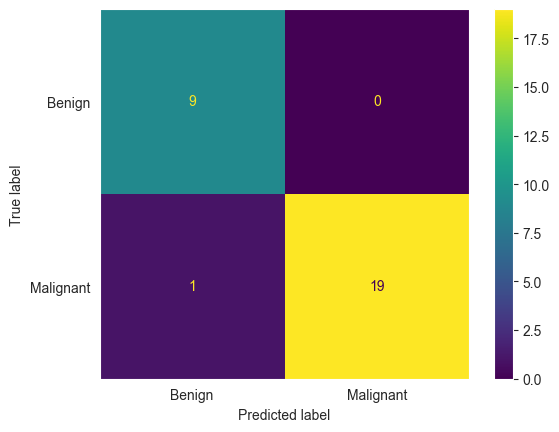

In [144]:
# Plot the confusion matrix
# IMPORTANT! display_labels should be in the same order as reg.classes_
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
# removing white lines in the plot squares
plt.rcParams['axes.grid'] = False
# display the plot of the confusion matrix
cm_display.plot()

* True Negative (top left): 9
* False Positive (top right): 0
* False Negative (bottom left): 1
* True Positive (bottom right): 19

Cheatsheet:
* True Positive (TP) - a sick person is predicted as sick.
* True Negative (TP) - a healthy person is predicted as healthy.
* False Positive (TP) - a healthy person is predicted as sick.
* False Negative (TP) - a sick person is predicted as healthy.

**Observations:**

Logistic Regression model has achieved 96.55% accuracy with test size of 5%. One patient with malignant breast cancer was predicted to be healthy (as benign case). Overall, the model shows promise and potentially could be used as a quick screening tool.

# 4. Forward Feature Selection
Forward Feature Selection is a technique for optimizing machine learning models. Its goal is to find the best possible combination of features that can help the model achieve the highest possible performance. In this process, the algorithm starts with no features and incrementally adds the best-performing features, one at a time, based on the specified scoring criteria, such as accuracy. 

By specifying a range of k_features from 1 to n, where n is the total number of features, the SequentialFeaturesSelector algorithm evaluates all possible feature combinations and selects the one that yields the highest accuracy score (in our case). This process helps to reduce the dimensionality of the dataset and improve the model's generalization performance, making it more robust to new data.

Feature Selection is best used when the number of features is high. In this case, we have 5 features, which sharply increases the chance that all those features will be selected as the best. **Feature selection in this chapter is for showcasing purposes only.**

Code adapted from: https://www.youtube.com/watch?v=POCvLGRLDzM

In [145]:
# define feature and target variable
X = cancer.drop('diagnosis', axis = 1).values  # features
y = cancer['diagnosis'].values  # target

# splitting the data into train and test, so we save computation power and run time
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1, random_state = 77)

# we have 5 feature columns
print(f'X_train shape: {X_train.shape}')

X_train shape: (512, 5)


In [146]:
# Create a linear regression model
reg = LogisticRegression(max_iter = 1000)

In [147]:
# Create a sequential forward feature selector
# verbose=2 shows the output of parallel jobs when we fit to sfs
sfs = SequentialFeatureSelector(reg, k_features = (1, 5), forward = True, scoring = 'accuracy', verbose = 2).fit(X_train, y_train)
# storing selected features in a variable
# selected_features = X_train.columns[sfs.support_]
# storing removed features in a variable
# removed_features = X_train.columns[~sfs.support_]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2023-04-23 22:02:18] Features: 1/5 -- score: 0.8809251856082237[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-04-23 22:02:19] Features: 2/5 -- score: 0.8945935655815724[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-04-23 22:02:19] Features: 3/5 -- score: 0.9121073672187322[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [148]:
# Print the selected features and their indices
print('Selected features:', sfs.k_feature_names_)
print('Selected feature indices:', sfs.k_feature_idx_)

Selected features: ('0', '1', '2')
Selected feature indices: (0, 1, 2)


In [149]:
# select column indexes of best features
col_index = sfs.k_feature_idx_

# Loop over each index position in the list and get their column names
best_features = []
for i in col_index:
    best_features.append(cancer.columns[i])

print(best_features) # prints column names according to col index aka ['col2', 'col4', 'col5', etc]

# print the number of items in the list
print(f'Number of best features: {len(best_features)}')

['mean_radius', 'mean_texture', 'mean_perimeter']
Number of best features: 3


In [150]:
sfs.k_score_

0.9121073672187322

In [151]:
# converting to pd
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.8737864077669902, 0.8543689320388349, 0.911...",0.880925,"(2,)",0.028626,0.022272,0.011136
2,"(0, 2)","[0.883495145631068, 0.8737864077669902, 0.9215...",0.894594,"(0, 2)",0.028725,0.022349,0.011174
3,"(0, 1, 2)","[0.912621359223301, 0.912621359223301, 0.92156...",0.912107,"(0, 1, 2)",0.021092,0.01641,0.008205
4,"(0, 1, 2, 4)","[0.912621359223301, 0.912621359223301, 0.92156...",0.912107,"(0, 1, 2, 4)",0.021092,0.01641,0.008205
5,"(0, 1, 2, 3, 4)","[0.883495145631068, 0.9029126213592233, 0.9117...",0.90238,"(0, 1, 2, 3, 4)",0.023606,0.018367,0.009183


**Observation:**

Feature selection has identified 3 best features with whom we should get highest accuracy: 'mean_radius', 'mean_texture', 'mean_perimeter'. This means that 'mean_area' and 'mean_smothness' don't add value to the model, as the accuracy score remained the same when we used 3 or 5 features (see 5th section).

# 5. Logistic Regression with best features

In [161]:
# Splitting data into train and test datasets
X = cancer[best_features]
y = cancer['diagnosis']

In [162]:
X_train, X_test, y_train, y_test_lr = train_test_split(X, y, test_size = 0.05, random_state = 77)
# assigning the regressor
# default max_iter=100 is too small for the dataset and needs increasing the number of iterations
reg = LogisticRegression(max_iter = 10000)
reg.fit(X_train, y_train)
# Predictions on test data
lr_y_pred = reg.predict(X_test)

In [163]:
print(accuracy_score(y_test_lr, lr_y_pred))

0.9655172413793104


In [155]:
pd.DataFrame({'Actual': y_test_lr, 'Predicted': lr_y_pred})

,Actual,Predicted
120,1,1
17,0,0
285,1,1
393,0,0
177,0,0
562,0,0
483,1,1
559,1,1
89,1,1
252,0,0


In [156]:
# printing confusion matrix
# run the confusion matrix function on actual and predicted values
cm = confusion_matrix(y_test_lr, lr_y_pred, labels = reg.classes_)
print(cm)

[[ 9  0]
 [ 1 19]]


In [157]:
# testing test_size impact on accuracy score

# empty list for plotting results
accuracies = []

# test sizes to be tested
test_sizes = [0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for test_size in test_sizes:
    # split the data into training and test sets
    X_train, X_test, y_train, y_test_lr = train_test_split(X, y, test_size = test_size, random_state = 77)
    
    # fit a logistic regression model on the training data
    reg = LogisticRegression(max_iter = 10000)
    reg.fit(X_train, y_train)
    
    # predictions on test data
    lr_y_pred = reg.predict(X_test)
    
    # calculate the accuracy of the model
    accuracy = accuracy_score(y_test_lr, lr_y_pred)
    
    # adding the scores to empty list to visualize later
    accuracies.append(accuracy)
    print(f"Test size: {test_size}, Accuracy: {accuracy}")

Test size: 0.03, Accuracy: 1.0
Test size: 0.04, Accuracy: 0.9565217391304348
Test size: 0.05, Accuracy: 0.9655172413793104
Test size: 0.1, Accuracy: 0.9298245614035088
Test size: 0.2, Accuracy: 0.9035087719298246
Test size: 0.3, Accuracy: 0.9181286549707602
Test size: 0.4, Accuracy: 0.9035087719298246
Test size: 0.5, Accuracy: 0.9052631578947369
Test size: 0.6, Accuracy: 0.9122807017543859


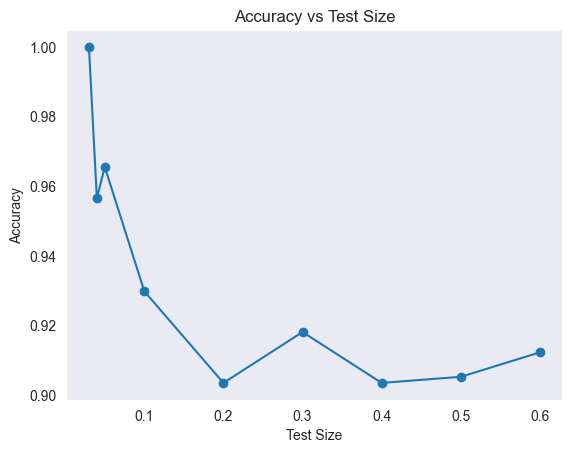

In [158]:
# visualizing accuracy test results
# plot the results
plt.plot(test_sizes, accuracies, marker = 'o')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Test Size')
plt.show()

**Observations:**

With all 5 features, we had an accuracy of 96.55%. Forward Feature Selection predicted that the model will have the same accuracy with 3 features as it did with all 5 features. Logistic regression with 3 best features confirmed this observation: accuracy is the same with 3 and 5 features. That means that the features 'mean_area' and 'mean_smoothness' don't add value to the model's accuracy under the current selection test size of 0.1 (changing this gives other combinations).

As the test size increases, the accuracy decreases (except for a spike at test size 0.3 and 0.6), which suggests that the model may be overfitting to the training data. Overfitting means the model is too complex and fits the training data too closely (resulting in good performance on the training set but poor generalization to new data).

# 6. Conclusion
### Breast Cancer predictor model, using Logistic Regression, has reached 96.55% accuracy. In other words, the model is able to predict the diagnosis of breast cancer in 96.55% of the cases. Such **accuracy is not enough for the model to be deployed in a real clinical setting**, but could be used as a helping tool for screening.